# 1. Exploratory Analysis of Ozone Data

## Purpose, contents, & conclusions

**Purpose:** This notebook contains exploratory analysis of ozone data from the [Central Los Angeles](http://www.aqmd.gov/docs/default-source/clean-air-plans/air-quality-monitoring-network-plan/aaqmnp-losangeles.pdf) air quality monitoring station for 2000 - 2021. Its purpose is to prepare for data preprocessing and subsequent modeling by (1) evaluating seasonality in ozone pollution, and (2) scout hypotheses for feature engineering.

**Contents:** The notebook contains:
* Importing the data and conducting data cleaning.
* Basic data visualization for seasonality and distribution of ozone pollution values.
* Calculation of correlation coefficients to determine appropriate features for subsequent model training.

**Conclusions:** Key conclusions & outputs are:
* The notebook saves a cleaned ozone data set as `cleaned_O3_data.csv`.
* Ozone pollution exhibits high seasonality within one day and within one year.
* Ozone pollution is meaningfully correlated to air temperature (ρ = 0.46), wind speed (ρ = 0.40), and wind direction (ρ = 0.40).
* Transforming wind data into vector format (speed in the north-south and east-west directions) provides a stronger correlation (ρ ≈ -0.57).
* *Subsequent model development should use the following three features: air temperature, north-south wind vector, and east-west wind vector.*

## Import the unprocessed data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("la_aq.csv")

In [3]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [4]:
df.head()

,DateTime,CO,NO2,O3,PM10,PM2.5,SO2,T,WD,WS
0,2000-01-01 00:00:00,2.39,26.0,1.0,59.0,NaN,NaN,53.5,356.6,0.6
1,2000-01-01 01:00:00,2.28,25.0,1.0,42.0,NaN,NaN,53.6,0.7,1.1
2,2000-01-01 02:00:00,2.44,24.0,1.0,38.0,NaN,NaN,53.8,15.4,1.0
3,2000-01-01 03:00:00,2.59,22.0,2.0,68.0,NaN,NaN,53.6,33.8,1.3
4,2000-01-01 04:00:00,0.00,0.0,0.0,80.0,NaN,NaN,53.4,30.6,1.9


In [5]:
df["O3"].describe()

count    185304.000000
mean         20.972887
std          18.495664
min           0.000000
25%           4.000000
50%          18.000000
75%          34.000000
max         153.000000
Name: O3, dtype: float64

## Basic data cleaning
This data set already looks pretty clean. Drop any rows that do not contain O3 values, as well as the columns that contain air pollutants that are not of interest here.

In [6]:
df = df[["DateTime", "O3", "T", "WD", "WS"]]
df = df[df["O3"].notna()]
df

,DateTime,O3,T,WD,WS
0,2000-01-01 00:00:00,1.0,53.5,356.6,0.6
1,2000-01-01 01:00:00,1.0,53.6,0.7,1.1
2,2000-01-01 02:00:00,1.0,53.8,15.4,1.0
3,2000-01-01 03:00:00,2.0,53.6,33.8,1.3
4,2000-01-01 04:00:00,0.0,53.4,30.6,1.9
...,...,...,...,...,...
185907,2021-12-31 19:00:00,5.0,52.0,11.0,2.0
185908,2021-12-31 20:00:00,6.0,52.0,2.0,3.0
185909,2021-12-31 21:00:00,4.0,51.0,7.0,2.0
185910,2021-12-31 22:00:00,1.0,49.0,6.0,3.0


In [7]:
df["O3"].isna().sum()

0

Confirmed -- there are no rows left that do not contain a value for O3.

## Visualize the data

### For seasonality with each year

In [8]:
from datetime import datetime

<AxesSubplot:xlabel='DateTime'>

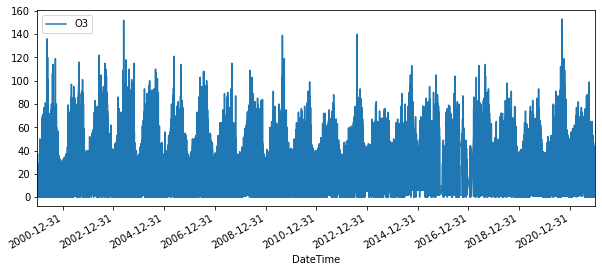

In [9]:
start_date = datetime(2000, 1, 1)
end_date = datetime(2021, 12, 31)

annual_plt = df.plot(kind = "line",
                     x = "DateTime",
                     y = "O3",
                     figsize = (10, 4),
                     xlim = (start_date, end_date),
                     xticks = pd.date_range(start = start_date,
                                            end = end_date,
                                            freq = "2Y").tolist()
                    )
annual_plt

**Ozone pollution is cyclical within each year,** with a peak in the hot summer months.

### For short-term seasonality

<AxesSubplot:xlabel='DateTime'>

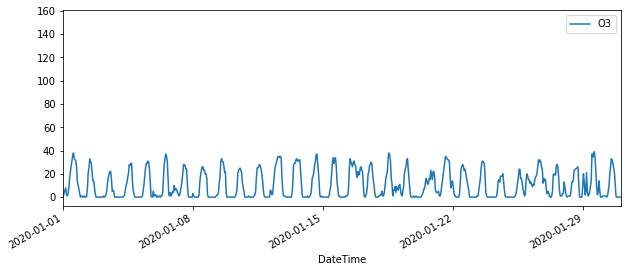

In [10]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 1, 31)

daily_plt = df.plot(kind = "line",
                     x = "DateTime",
                     y = "O3",
                     figsize = (10, 4),
                     xlim = (start_date, end_date),
                     xticks = pd.date_range(start = start_date,
                                            end = end_date,
                                            freq = "7D").tolist()
                    )
daily_plt

**Ozone pollution is also cyclical within each day**, with a peak each afternoon.

### For distribution of ozone values
This will help determine if they need to be transformed before training the model.

<AxesSubplot:>

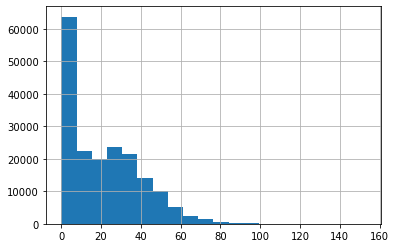

In [11]:
hist = df["O3"].hist(bins = 20)
hist

With a long tail of high O3 values, this data may ultimately benefit from a log transformation.

## Feature engineering

In this section, additional potential features are introduced to the dataframe. Their correlation to ozone pollution, if any, is calculated later.

### To categorize the date/time component

Here, the date/time component is broken into categorical data (month of the year, day of the month, etc.).

In [12]:
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month
df["DayOfMonth"] = df["DateTime"].dt.day
df["DayOfWeek"] = df["DateTime"].dt.dayofweek
df["DayOfYear"] = df["DateTime"].dt.dayofyear
df["Hour"] = df["DateTime"].dt.hour

In [13]:
df.head()

,DateTime,O3,T,WD,WS,Year,Month,DayOfMonth,DayOfWeek,DayOfYear,Hour
0,2000-01-01 00:00:00,1.0,53.5,356.6,0.6,2000,1,1,5,1,0
1,2000-01-01 01:00:00,1.0,53.6,0.7,1.1,2000,1,1,5,1,1
2,2000-01-01 02:00:00,1.0,53.8,15.4,1.0,2000,1,1,5,1,2
3,2000-01-01 03:00:00,2.0,53.6,33.8,1.3,2000,1,1,5,1,3
4,2000-01-01 04:00:00,0.0,53.4,30.6,1.9,2000,1,1,5,1,4


### To indicate which data points exceed EPA limits

Which data points exceed the [current US EPA limits of 70 ppb](https://www.govinfo.gov/content/pkg/FR-2015-10-26/pdf/2015-26594.pdf)? Introduce a new binary feature.

In [14]:
df["ExceedsLimit"] = df["O3"] > 70

In [15]:
# Fraction of data points exceeding the limit:
df["ExceedsLimit"].sum() / len(df)

0.011321935845961232

Only about 1% of data points show ozone pollution that exceeds the EPA standard.

### To transform wind data

The data set contains wind speed and wind direction. However, these potential features may only be meaningful when taken together. For example, fast wind from the ocean to the southwest may be different from fast wind from the desert to the northeast.

Transform the wind data into a vectorized format, reflecting the wind speed in the north-south (with north as positive) and east-west (with east as positive) directions.

In [16]:
from numpy import radians, sin, cos

In [17]:
df["WindNvec"] = cos(radians(df["WD"])) * df["WS"]
df["WindEvec"] = sin(radians(df["WD"])) * df["WS"] 

<AxesSubplot:xlabel='WindEvec', ylabel='WindNvec'>

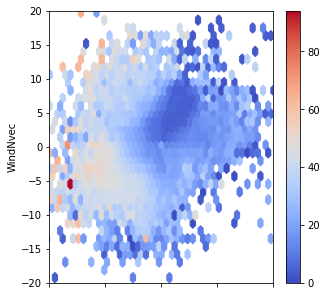

In [18]:
windvec = df.plot(kind = "hexbin", x = "WindEvec", y = "WindNvec", C = "O3",
                  figsize = (5, 5), colormap = "coolwarm", colorbar = True,
                  xlim = (-20, 20), ylim = (-20, 20)) 
windvec

## Correlation coefficients

Let's take a look at the correlation coefficients here, with the caveat that any of the cyclical date/time features won't be monotonic, and therefore won't give a meaningful correlation coefficient:

In [19]:
df.corr(method = "spearman")

,O3,T,WD,WS,Year,Month,DayOfMonth,DayOfWeek,DayOfYear,Hour,ExceedsLimit,WindNvec,WindEvec
O3,1.000000,0.460451,0.396714,0.402112,0.151819,-0.038059,0.012300,0.071424,-0.036897,0.259224,0.183363,-0.563195,-0.583854
T,0.460451,1.000000,0.462866,0.346354,0.011577,0.173731,0.001934,-0.006235,0.173039,0.170678,0.149335,-0.496624,-0.446482
WD,0.396714,0.462866,1.000000,0.364014,-0.040989,-0.003768,0.013653,0.000337,-0.002836,0.265052,0.062589,-0.351034,-0.744210
WS,0.402112,0.346354,0.364014,1.000000,-0.156015,-0.049875,0.004253,-0.006873,-0.049632,0.159372,0.106463,-0.263295,-0.362151
Year,0.151819,0.011577,-0.040989,-0.156015,1.000000,-0.002145,0.001714,0.000810,-0.002303,0.000196,-0.016820,0.046451,0.003979
Month,-0.038059,0.173731,-0.003768,-0.049875,-0.002145,1.000000,0.010356,-0.000723,0.996501,-0.000460,0.029306,0.012880,-0.010412
DayOfMonth,0.012300,0.001934,0.013653,0.004253,0.001714,0.010356,1.000000,0.000362,0.093657,0.000071,-0.007831,0.003708,-0.011139
DayOfWeek,0.071424,-0.006235,0.000337,-0.006873,0.000810,-0.000723,0.000362,1.000000,-0.000685,-0.000894,0.050797,-0.011629,-0.004440
DayOfYear,-0.036897,0.173039,-0.002836,-0.049632,-0.002303,0.996501,0.093657,-0.000685,1.000000,-0.000457,0.028612,0.012739,-0.011511
Hour,0.259224,0.170678,0.265052,0.159372,0.000196,-0.000460,0.000071,-0.000894,-0.000457,1.000000,0.033306,-0.241232,-0.347014


Correlation coefficients suggest a meaningful correlation between ozone levels and the three weather parameters -- temperature, wind speed, and wind direction. The vectorized wind features (`WindNvec` and `WindEvec`) are more strongly correlated to ozone pollution than the raw wind speed and direction (`WS` and `WD`).

**Three features should be used for subsequent development: air temperature `T`, the northerly wind vector `WindNvec`, and the easterly wind vector `WindEvec`.**

# Finish cleaning the data
There are a lot of zero values for wind speed, wind direction, and temperature. While no wind is certainly reasonable, 0 degrees F certainly isn't plausible in Southern California. Fill these values with NaN.

In [20]:
from numpy import nan

def remove_zero_temps(row):
    if row["T"] == 0:
        row["T"] = nan
    return row

In [21]:
df = df.apply(remove_zero_temps, axis = 1)

In [22]:
df["T"].describe()

count    168902.000000
mean         64.865738
std          10.489713
min          26.700000
25%          57.400000
50%          64.000000
75%          71.300000
max         113.100000
Name: T, dtype: float64

Now erroneous temperatures of 0 degrees F have been removed.

## Save processed data

In [23]:
# List all the available potential features
df.columns

Index(['DateTime', 'O3', 'T', 'WD', 'WS', 'Year', 'Month', 'DayOfMonth',
       'DayOfWeek', 'DayOfYear', 'Hour', 'ExceedsLimit', 'WindNvec',
       'WindEvec'],
      dtype='object')

In [24]:
# Decide which ones to export
keepcols = ["DateTime", "Year", "Month", "DayOfMonth", "DayOfWeek", "DayOfYear", "Hour", "O3", "T", "WS", "WD", "ExceedsLimit"]

In [25]:
df[keepcols].to_csv("cleaned_O3_data.csv", index = False)